(pe_basics_2)=
# Power Electronics Basics: Filtering and Analysis

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


        
<img src="./lec7/Slide3.PNG" align="left" width="62%">

In the last lecture we have learnt how to use switches to make a switch-mode voltage regulator, which has higher efficiency than its linear alternative.
In this lecture we continue to study the fundamentals for power electronics.

We will investigate into how to filter out the ripples caused by switching to get a more stable voltage output.
Since the filter is implemented by inductors and capacitors, we have to study how inductor and capacitor behave in the circuit.
In the end, we will see how to analyse the switched-mode circuit using quasi steady state approach.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec7/Slide4.PNG" align="left" width="62%">

After taking the lecture, we should be able to understand what is quasi steady state, apply quasi-steady state analysis of a switch-mode circuit based on the understanding of the behaviours of inductor and the capacitor in it.

```
````

## Harmonics in switchmode voltage regulator



````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec7/Slide5.PNG" align="left" width="62%">

On this slide you can see the switch-mode voltage regulator we studied in the last lecture.
Although the average value can be at the desirable voltage by controlling the duty cycle of the switch, it contains switching ripples because of the on/off of the switch.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec7/Slide6.PNG" align="left" width="62%">

Here you can see the harmonic spectrum when the duty cycle $d=0.75$. As you can see, the 0-th order component (DC component, or the average) is $0.75V_s$, but there are substantial harmonics. 
The spectrum of the periodic switching wave can be obtained by Fourier Transformation, as shown in the example on the website below. The Python code below also shows a way to generate harmonic spectrum of a PWM waveform.
```
````

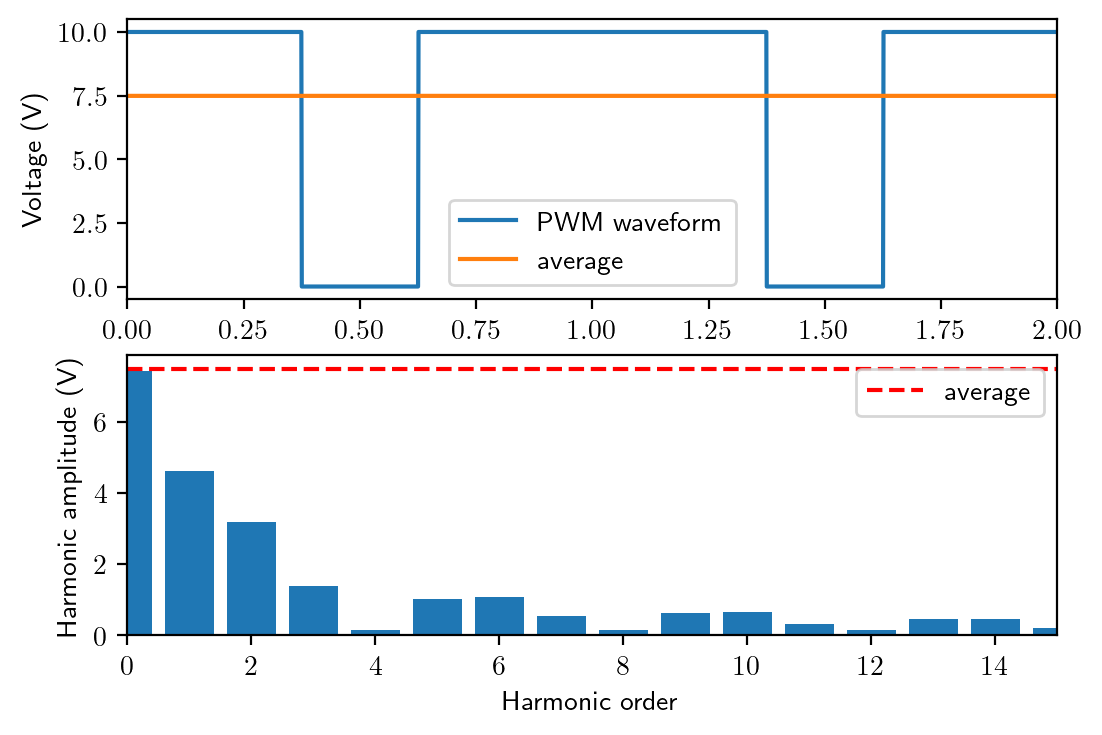

In [1]:
# code to generate harmonic spectrum of PWM waveform

import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6 , 4]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
import numpy as np
import mpmath as mp

N = 15 # maximum order of harmonics to solve
T = 1  # period
d = 0.75 # duty cycle
Amp = 10 # amplitude
# Define a rectangular function
@np.vectorize
def rect_fun(x):
    x = x/T
    x_period = x % 1.0 - 0.5
    if (x_period >= -(1-d)/2) and (x_period <= (1-d)/2):
        return 0
    else:
        return Amp

x = np.arange(0, 2*T, 0.001)
y = rect_fun(x)

c, s = mp.fourier(rect_fun, [0, T], N) # cos and sin series coefficients
xx   = x[np.newaxis]  # two dimensional time array, time in the columns
an = np.array(c) # cos coefficient
bn = np.array(s) # sine coeffcient
n  = np.arange(N+1) # orders

amp = np.sqrt(an**2+bn**2)

plt.subplot(2,1,1)
plt.plot(x, rect_fun(x), label='PWM waveform')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.xlim([0, 2*T])
plt.plot(x, np.ones_like(x)*np.average(y), label='average')
plt.legend()
plt.subplot(2,1,2)
plt.bar(n, amp)
plt.plot(n, np.ones_like(n)*np.average(y), '--', color='r', label='average')
plt.xlabel('Harmonic order')
plt.ylabel('Harmonic amplitude (V)')
plt.xlim([0, N])
plt.legend()
plt.show()

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


        
<img src="./lec7/Slide7.PNG" align="left" width="62%">

In order to make the output voltage "cleaner", we have to extract the DC component from the PWM waveform by filtering out the harmonics. Adding a filter to the circuit is a simple solution. Among various filters, a low pass LC filter is a good solution because it is relatively simple and is able to attenuate the harmonics effectively.

Here it shows a switch-mode voltage regulator with LC filter at the output.
As you can see here, since there is an inductor connected to the output, a diode is needed to provide a path for the current to flow when the switch is turned off (Please review the last lecture or the coming slides for the exact reason).
```

````

(ind_cap)=
## Inductors and capacitors in switchmode converter



````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec7/Slide8.PNG" align="left" width="62%">

Since the filter is composed of an inductor and a capacitor, we should study the behaviours of them in order to analyse the switch-mode converter.

For a capacitor, the voltage across it $v_c$ is not able to change abruptly.
The electrical energy stored inside it is proportional to the square of the voltage across it. The voltage change rate across the capacitor $\mathrm{d}v_c/\mathrm{d}t$ is limited by $1/C$.

For an inductor, the current through it $i_L$ is not able to change abruptly.
The electrical energy stored inside it is proportional to the square of the current through it. The current change rate through the inductor $\mathrm{d}i_L/\mathrm{d}t$ is limited by $1/L$.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec7/Slide9.PNG" align="left" width="62%">

Since the current through the inductor cannot change instantaneously, therefore, we have to provide paths for the current to flow for both on and off states of the switch.

When the switch is on, the inductor current flows through the switch, which is the primary path. 
When the switch is off, the inductor current flows through the diode connected to the switch, which is called the freewheeling path.

In both states, we are able to solve the current through the inductor by taking the integral of the voltage across it.


When the circuit reaches steady state, the current wavefrom in each switching period should be the same, i.e.,

$$
i_L(qT_s) = i_L((q+1)T_s).
$$

where $q$ is an integer representing $q-th$ number of period, and $T_s$ is the period of each switching cycle.

The average voltage applied on the inductor should be zero, otherwise the current at the end of the switching period does not match the starting current at the beginning of the next switching period.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec7/Slide10.PNG" align="left" width="62%">

Similarly, since the voltage across the capacitor cannot change instantaneously, the output voltage will be smoothed out by the capacitor.

When the circuit reaches steady state, the voltage waveform should be the same in each cycle, i.e.,

$$
v_c(qT_s) = v_c((q+1)T_s).
$$

therefore, the average current through the capacitor must be zero.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec7/Slide11.PNG" align="left" width="62%">

Here it shows the above discussion in mathematical language.
For an inductor, when it is at quasi steady state, the current waveform will be periodic and the average voltage across it in each period must be zero.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec7/Slide12.PNG" align="left" width="62%">

Similarly, for the capacitor, when it is at quasi steady state, the voltage waveform will be periodic and the average current through it in each period must be zero.

Here the term "quasi steady state" is used to represent the situation that is changing slowly enough that we can consider it to be steady although there might be some slow and small variations. The quasi steady state approximation is necessary here since there is rarely real steady state in practice.
```

````

## Modelling of buck converter



````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec7/Slide13.PNG" align="left" width="62%">

The output voltage of the switch-mode voltage regulator we have been studying so far is $v_o = dV_s$. Since the duty cycle is always between 0 and 1, the output voltage will be either equal to or below the input voltage, therefore, it is also called as a buck converter, or sometimes as a chopper or a step-down converter.

The two schematics on the right hand side show the on and off states of the converter. 

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec7/Slide14.PNG" align="left" width="62%">

Now let's check the two states in more detail.
When the switch is closed (on-state, or state I), the switching signal $s(t)=1$. The current through the inductor $i_L$ increases because a positive voltage $V_s-v_c$ is applied across it, so we have:

$$
\begin{align}
\newcommand\diff{\mathrm{d}}
L\frac{\diff i_L}{\diff t} &= V_s - v_c\\
C\frac{\diff v_c}{\diff t} &= i_L - \frac{v_c}{R}.
\end{align}
$$

When the switch is off (off-state or state II), $s(t)=0$. $i_L$ decreases since a negative voltage $-v_c$ is applied on it, so we have

$$
\begin{align}
\newcommand\diff{\mathrm{d}}
L\frac{\diff i_L}{\diff t} &= - v_c\\
C\frac{\diff v_c}{\diff t} &= i_L - \frac{v_c}{R}.
\end{align}
$$

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec7/Slide15.PNG" align="left" width="62%">

Now let's see how to model the buck converter mathematically. 
In order to make the model suitable for simulation and controller design, we often use the [state space](https://lpsa.swarthmore.edu/Representations/SysRepSS.html) approach to model the converters.
The model will be in the form of a first-order differential equation:

$$
\newcommand\diff{\mathrm{d}}
\frac{\diff}{\diff t}\mathbf{x} = \mathbf{Ax}+\mathbf{B}\mathbf{u}
$$

where $\mathbf{x}$ is the state variable, $\mathbf{u}$ is the input to the system, $\mathbf{A}$ is the state matrix, $\mathbf{B}$ is the input matrix.

For the buck converter, it is convenient to use the inductor current $i_L$ and the capacitor voltage $v_c$ as state variables since they represent the electrical energy stored in the circuit. Then we have

$$
\mathbf{x} = \begin{bmatrix}
i_L\\
v_c
\end{bmatrix}, \quad
\mathbf{u} = V_s.
$$

The state matrix $\mathbf{A}$ and input matrix $\mathbf{B}$ have two forms depending on the on/off state of the switch.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec7/Slide16.PNG" align="left" width="62%">

When the switch is on (closed, or state I), according to the analysis in the previous slides, we can derive the state matrix and the input matrix as

$$
\mathbf{A_1} = \begin{bmatrix}
0 & \frac{-1}{L}\\
\frac{1}{C} & \frac{-1}{RC}
\end{bmatrix}, \quad
\mathbf{B_1} = \begin{bmatrix}
\frac{1}{L}\\
0
\end{bmatrix}.
$$

When the switch is off (open, or state II), according to the analysis in the previous slides, we can derive the state matrix and the input matrix as

$$
\mathbf{A_2} = \begin{bmatrix}
0 & \frac{-1}{L}\\
\frac{1}{C} & \frac{-1}{RC}
\end{bmatrix}, \quad
\mathbf{B_2} = \begin{bmatrix}
0\\
0
\end{bmatrix}.
$$

These equations give a complete description of the buck converter circuit in ordinary differential equations (ODEs). 
However, solving it requires some advanced mathematics. 
We would use either numerical integration implemented in computers to solve it, or use mathematical tools to derive an analytical solution.
Since this course is on the BSc level, this topic will not be addressed further.
We will study a simplified method to analyse the power converters by applying the quasi steady state assumptions.
The code below shows a way to solve the state space model of a buck converter using numerical method in Python. 
Please be aware that this is just an example to show how this method works and it is beyond the level of this course.
```
````

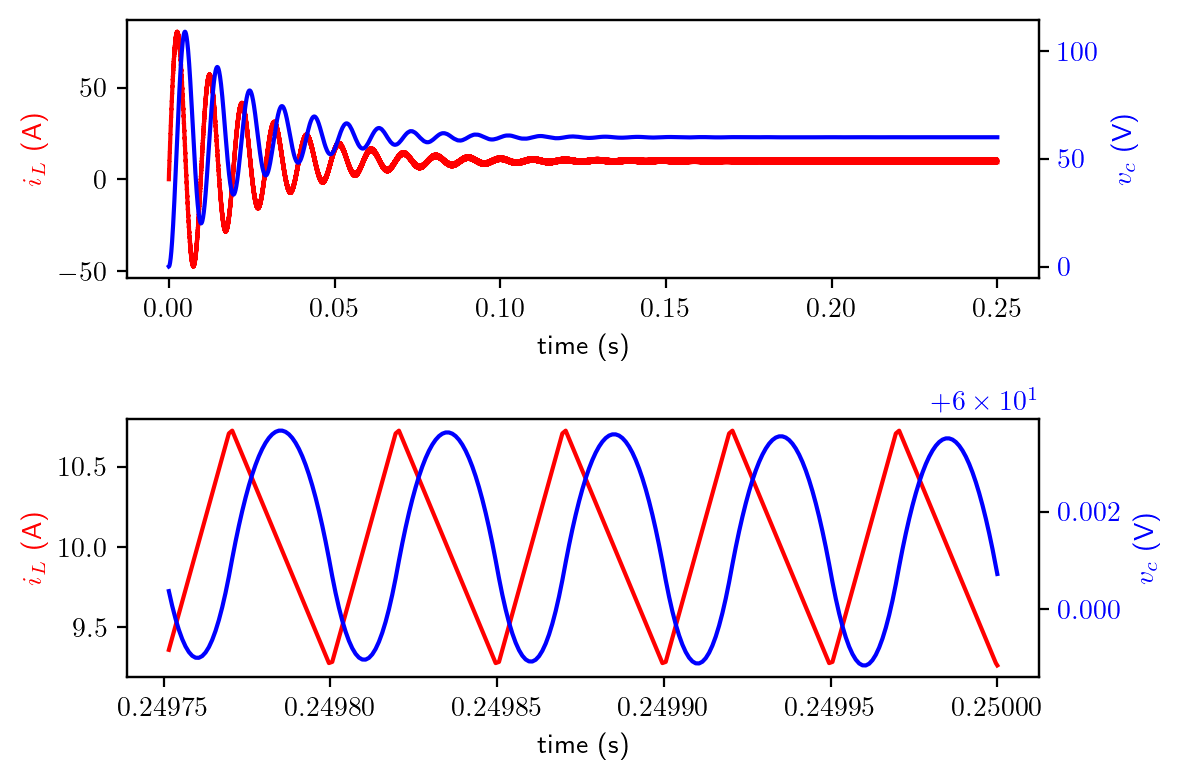

In [2]:
%reset -f
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
V_s = 150.0 # source voltage
d   = 0.4   # duty cyle
L   = 1.2e-3 
C   = 2.0e-3
R   = 6.0

fs  = 20.0e3 # swtiching frequency

A   = np.array([[0, -1/L], [1/C, -1/R/C]])
B   = np.array([1/L,0])
x0  = np.array([0,0])
def buck_ode(t, x, A, B, V_s, d, Ts):
    t = t/Ts
    x_period = t % 1.0
    if x_period <= d:
        dxdt = A@x+B*V_s
    else:
        dxdt = A@x
    return dxdt

# we use Runge-Kutta method to solve the state space model

sol = solve_ivp(buck_ode, (0,1/fs*5000), x0, method='RK45', args=(A, B, V_s, d, 1/fs), max_step=1/fs/50)

t = sol['t']
il_vc = sol['y'].T

fig, (ax1,ax3) = plt.subplots(2,1)
ax1.plot(t, il_vc[:,0], color='red')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('$i_L$ (A)', color='red')

ax2 = ax1.twinx() 
ax2.plot(t, il_vc[:,1], color='blue')
ax2.set_ylabel('$v_c$ (V)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


# zoom into the last 5 cycles

ax3.plot(t[-250:], il_vc[-250:,0], color='red')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('$i_L$ (A)', color='red')

ax4 = ax3.twinx() 
ax4.plot(t[-250:], il_vc[-250:,1], color='blue')
ax4.set_ylabel('$v_c$ (V)', color='blue')
ax4.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.show()

## Homework

`````{grid}

````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


        
<img src="./lec7/Slide17.PNG" align="left" width="62%">

This slide shows the homework for the lecture today. Please first try to work out yourself and click the button below for answers.

```{admonition} Hints
:class: tip

Please try to tackle the question 2 and 3 by studying the two states of the circuits.

```
````
`````

```{admonition} Question 1.
:class: tip, dropdown

If the component is inductor, we know the current through it cannot change instantaneously. So when a switch is connected in series with an inductor, and is suddenly switched off, the energy stored in the inductor will create a sudden increase in voltage which will destroy the switch.
In such case, a freewheeling diode is necessary to provide a path for the current when the switch is off.

If the component is a capacitor, we know the voltage through it cannot change instantaneously. So when a switch is connected in parallel to a capacitor, and is suddenly switched on, the energy stored in the capacitor will create a sudden increase in current which will destroy the switch.
In such case, a current limiting inductor/resistor is needed to avoid extremely high current peak.

```

```{admonition} Question 2.
:class: tip, dropdown

The switch only needs to block voltage when it is off (state II).
We know if the switch is off, current will go through the diode, and make the diode forward-biased.
Considering an ideal diode is assumed, the terminals of the switch is connected to the input voltage source on one side, and ground to the other side, then the voltage across the switch would be the input voltage.

```

```{admonition} Question 3.
:class: tip, dropdown

<img src="./lec7/Slide18.PNG" align="left" width="62%">

Well, this circuit has been calculated by numerical integration method by the Python code above.
As you can see, when the circuit reaches the steady state (last 5 cycles, as plotted in the second figure), the $i_L$ current waveform becomes a periodic triangular waveform with an average of 10 A, while the $v_c$ waveform shows a periodic pattern with an average of 60 V.
However, numerical solving is out of the scope of the course, as we discussed earlier. In this lecture, we will introduce the simplified method based on stead state analysis.

At steady state, we assume that the output capacitor $C$ is big enough to smooth out the voltage ripples sufficiently, so the output voltage $v_o$ is constant. Based on that, we will be able to analyse $i_L$. Once we have $i_L$, we will be able to study the current going into and out of $C$ to calculate the output voltage ripple.

<img src="./lec7/Slide19.PNG" align="left" width="62%">

As we studied in [inductors and capacitors](ind_cap) part of the lecture, we know at steady state, $i_L$ will be periodic, which has been proved in the Python simulation above. 

Since the current increase rate through an inductor is limited by $V_L/L$, so if we assume the output voltage is constant, then we know for the triangular waveform of $i_L$,

- when the switch is closed, the slope of the waveform is $(V_s-V_c)/L$;
- when the switch is open, the slope of the waveform is $-V_c/L$.

<img src="./lec7/Slide19.PNG" align="left" width="62%">

As being shown in the figures on the slide here, since $i_L$ has a periodic triangular wave shape, the current at the beginning of each period should match that of at the end, so we have

$$
m_1 dT_s = m_2T_s.
$$

which gives $V_c = dV_s$.

Similarly, the voltage across the capacitor also shows a periodic pattern. The charge flows into and out of the capacitor should be balanced. Then we know the average inductor current should match that of the output current. Otherwise the voltage across the capacitor will not reach the steady state. Therefore,

$$
i_o = \bar{i}_L = 10 A.
$$

In the next lecture, we will study the steady state based analysis for the buck converter further.

```